This notebook is for classification on the relative risk dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [6]:
# Relative Risk with PTS
lead = 6
obs = 1

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_no_pts.csv".format(lead, obs, lead, obs), low_memory=False)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    466.0  69.0           78.0            78.0   
1             151708      1   1647.0  79.0           38.0            38.0   
2             152171      1   2020.0  84.0           38.0            38.0   
3             155126      1   3161.0  71.0           65.0            65.0   
4             156970      1  17639.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
18193        3352386      0    588.0  45.0           36.0            36.0   
18194        3352563      0    930.0  34.0           54.0            54.0   
18195        3352747      0    886.0  30.0           31.0            31.0   
18196        3353044      0   3038.0  52.0           41.0            41.0   
18197        3353077      0   3410.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  1.0                4.0      2.0               0  ...   
1                  1.0                4.0      4.0               1  ...   
2                  0.0                4.0      2.0               0  ...   
3                  0.0                4.0      4.0               1  ...   
4                  1.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
18193              1.0                2.0      2.0               0  ...   
18194              1.0                4.0      2.0               0  ...   
18195              1.0                4.0      4.0               0  ...   
18196              1.0                4.0      2.0               0  ...   
18197              1.0                4.0      4.0               0  ...   

      comorbidity_alcohol comorbidity_drug comorbidity_depre last_24hr_urine  \
0                       0                0                 0             NaN   
1                       0                0                 0           300.0   
2                       0                0                 0             NaN   
3                       0                0                 0             NaN   
4                       1                0                 0          2345.0   
...                   ...              ...               ...             ...   
18193                   0                0                 0          1200.0   
18194                   0                0                 0          1555.0   
18195                   0                0                 0          1800.0   
18196                   0                0                 0          2890.0   
18197                   0                0                 0          2750.0   

      tranfuse_rbc tranfuse_plasma tranfuse_platelet dialysis surgical  \
0                0               0                 0        1        0   
1                0               0                 0        0        0   
2                0               0                 0        0        1   
3                1               0                 0        0        1   
4                0               0                 0        0        0   
...            ...             ...               ...      ...      ...   
18193            0               0                 0        0        0   
18194            0               0                 0        0        0   
18195            0               0                 0        0        0   
18196            0               0                 0        0        0   
18197            0               0                 0        0        1   

       mv_duration  
0              0.0  
1              0.0  
2              0.0  
3            117.0  
4              0.0  
...            ...  
18193          7.0  
18194          0.0  
18195          0.0  
18196          0.0  
18197          0.0  

[18198 rows x 269 columns]

In [7]:
data = process_all(data)
data["mv_duration_ratio"] = data["mv_duration"]/data["LOS"]
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    466.0  69.0           78.0            78.0   
1             151708      1   1647.0  79.0           38.0            38.0   
2             152171      1   2020.0  84.0           38.0            38.0   
3             155126      1   3161.0  71.0           65.0            65.0   
4             156970      1  17639.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
18193        3352386      0    588.0  45.0           36.0            36.0   
18194        3352563      0    930.0  34.0           54.0            54.0   
18195        3352747      0    886.0  30.0           31.0            31.0   
18196        3353044      0   3038.0  52.0           41.0            41.0   
18197        3353077      0   3410.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
18193              1.0      2.0               0     1.0  ...   
18194              1.0      2.0               0     1.0  ...   
18195              1.0      4.0               0     0.0  ...   
18196              1.0      2.0               0     0.0  ...   
18197              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Other UnitAdmitSource_OtherHospital  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
18193                     0                             0   
18194                     0                             0   
18195                     0                             0   
18196                     0                             0   
18197                     0                             0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
18193                     0                    0                   1   
18194                     0                    0                   1   
18195                     0                    0                   1   
18196                     0                    0                   1   
18197                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...                     ...                    ...                    ...   
18193                     0                      0                      0   
18194                     0                      0                      0   
18195                 

In [8]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    466.0  69.0           78.0            78.0   
1             151708      1   1647.0  79.0           38.0            38.0   
2             152171      1   2020.0  84.0           38.0            38.0   
3             155126      1   3161.0  71.0           65.0            65.0   
4             156970      1  17639.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
18193        3352386      0    588.0  45.0           36.0            36.0   
18194        3352563      0    930.0  34.0           54.0            54.0   
18195        3352747      0    886.0  30.0           31.0            31.0   
18196        3353044      0   3038.0  52.0           41.0            41.0   
18197        3353077      0   3410.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  1.0      2.0               0     1.0  ...   
1                  1.0      4.0               1     0.0  ...   
2                  0.0      2.0               0     1.0  ...   
3                  0.0      4.0               1     0.0  ...   
4                  1.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
18193              1.0      2.0               0     1.0  ...   
18194              1.0      2.0               0     1.0  ...   
18195              1.0      4.0               0     0.0  ...   
18196              1.0      2.0               0     0.0  ...   
18197              1.0      4.0               0     1.0  ...   

      UnitAdmitSource_Other UnitAdmitSource_OtherHospital  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
...                     ...                           ...   
18193                     0                             0   
18194                     0                             0   
18195                     0                             0   
18196                     0                             0   
18197                     0                             0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
18193                     0                    0                   1   
18194                     0                    0                   1   
18195                     0                    0                   1   
18196                     0                    0                   1   
18197                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...                     ...                    ...                    ...   
18193                     0                      0                      0   
18194                     0                      0                      0   
18195                 

In [9]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead,obs), "ventilator", "vented"]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []
exceptions = []
#exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [10]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [11]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

18160


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
0           150934.0    466.0  69.0           78.0              1.0      2.0   
1           151708.0   1647.0  79.0           38.0              1.0      4.0   
2           152171.0   2020.0  84.0           38.0              0.0      2.0   
3           155126.0   3161.0  71.0           65.0              0.0      4.0   
4           156970.0  17639.0  56.0           32.0              1.0      4.0   
...              ...      ...   ...            ...              ...      ...   
18193      3352386.0    588.0  45.0           36.0              1.0      2.0   
18194      3352563.0    930.0  34.0           54.0              1.0      2.0   
18195      3352747.0    886.0  30.0           31.0              1.0      4.0   
18196      3353044.0   3038.0  52.0           41.0              1.0      2.0   
18197      3353077.0   3410.0  60.0           36.0              1.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
0                 0.0     1.0        152.4    74.800000  ...   
1                 1.0     0.0        175.3    70.800000  ...   
2                 0.0     1.0        165.1    84.247803  ...   
3                 1.0     0.0        165.1    83.200000  ...   
4                 1.0     0.0        167.6    90.500000  ...   
...               ...     ...          ...          ...  ...   
18193             0.0     1.0        160.0    63.500000  ...   
18194             0.0     1.0        172.7    81.600000  ...   
18195             0.0     0.0        167.6    62.600000  ...   
18196             0.0     0.0        175.0    52.000000  ...   
18197             0.0     1.0        165.1   120.600000  ...   

       UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                        0.0                            0.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            0.0   
...                      ...                            ...   
18193                    0.0                            0.0   
18194                    0.0                            0.0   
18195                    0.0                            0.0   
18196                    0.0                            0.0   
18197                    0.0                            0.0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                       0.0                  0.0                 1.0   
1                       0.0                  0.0                 1.0   
2                       0.0                  0.0                 1.0   
3                       0.0                  0.0                 1.0   
4                       0.0                  0.0                 1.0   
...                     ...                  ...                 ...   
18193                   0.0                  0.0                 1.0   
18194                   0.0                  0.0                 1.0   
18195                   0.0                  0.0                 1.0   
18196                   0.0                  0.0                 1.0   
18197                   0.0                  0.0                 1.0   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
18193                   0.0                    0.0                    0.0   
18194                   0.0            

In [12]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID       LOS       Age  APACHEIVscore  UrgentAdmission  \
0           150934.0 -0.529756  0.331514       0.860547         0.356329   
1           151708.0 -0.215511  0.931688      -0.808623         0.356329   
2           152171.0 -0.116262  1.231775      -0.808623        -2.806395   
3           155126.0  0.187339  0.451549       0.318067        -2.806395   
4           156970.0  4.039694 -0.448713      -1.058998         0.356329   
...              ...       ...       ...            ...              ...   
18193      3352386.0 -0.497294 -1.108905      -0.892081         0.356329   
18194      3352563.0 -0.406293 -1.769097      -0.140955         0.356329   
18195      3352747.0 -0.418001 -2.009166      -1.100727         0.356329   
18196      3353044.0  0.154611 -0.688783      -0.683435         0.356329   
18197      3353077.0  0.253594 -0.208643      -0.892081         0.356329   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
0     -1.624063       -0.730694  1.059475    -1.016601    -0.345209  ...   
1      0.871465        1.368562 -0.943864     0.394151    -0.491442  ...   
2     -1.624063       -0.730694  1.059475    -0.234219     0.000188  ...   
3      0.871465        1.368562 -0.943864    -0.234219    -0.038118  ...   
4      0.871465        1.368562 -0.943864    -0.080207     0.228758  ...   
...         ...             ...       ...          ...          ...  ...   
18193 -1.624063       -0.730694  1.059475    -0.548404    -0.758318  ...   
18194 -1.624063       -0.730694  1.059475     0.233978    -0.096612  ...   
18195  0.871465       -0.730694 -0.943864    -0.080207    -0.791221  ...   
18196 -1.624063       -0.730694 -0.943864     0.375670    -1.178740  ...   
18197  0.871465       -0.730694  1.059475    -0.234219     1.329165  ...   

       UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                  -0.034827                      -0.192516   
1                  -0.034827                      -0.192516   
2                  -0.034827                      -0.192516   
3                  -0.034827                      -0.192516   
4                  -0.034827                      -0.192516   
...                      ...                            ...   
18193              -0.034827                      -0.192516   
18194              -0.034827                      -0.192516   
18195              -0.034827                      -0.192516   
18196              -0.034827                      -0.192516   
18197              -0.034827                      -0.192516   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                 -0.244453            -0.183248            0.405464   
1                 -0.244453            -0.183248            0.405464   
2                 -0.244453            -0.183248            0.405464   
3                 -0.244453            -0.183248            0.405464   
4                 -0.244453            -0.183248            0.405464   
...                     ...                  ...                 ...   
18193             -0.244453            -0.183248            0.405464   
18194             -0.244453            -0.183248            0.405464   
18195             -0.244453            -0.183248            0.405464   
18196             -0.244453            -0.183248            0.405464   
18197             -0.244453            -0.183248            0.405464   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                  -0.23586              -0.224858              -0.205088   
1                  -0.23586              -0.224858              -0.205088   
2                  -0.23586              -0.224858              -0.205088   
3                  -0.23586              -0.224858              -0.205088   
4                  -0.23586              -0.224858              -0.205088   
...                     ...                    ...                    ...   
18193              -

In [33]:
for col in data.columns:
    print(col)

PatientStayID
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCHF
HistCABG
HistExerciseTol
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistPulmEmb
HistHeartTransp
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistIntracranialMass
HistNeuromuscularDis
HistSeizures
HistStrokes
HistTIA
HistAsthma
HistCOPD
HistRespiratoryFail
HistRestrictiveDis
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_6hr_lead_1hr_obsAcetaminophen
relative_6hr_lead_1hr_obsAdre

In [30]:
pr_baseline = np.sum(labels==1)/len(labels)

# Visualize Data

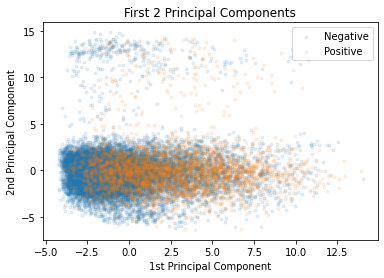

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [13]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.03, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [18]:
with open("../pickle/relative_6hr_lead_1hr_obs/mean_unpruned/lr", "wb") as f:
    pickle.dump(lr_calibrated, f)

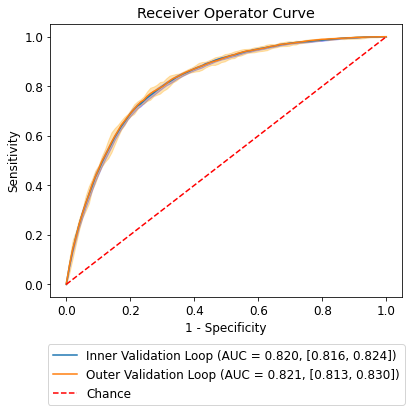

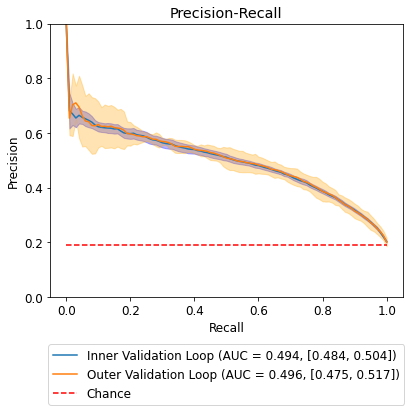

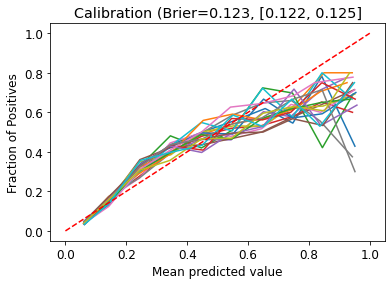

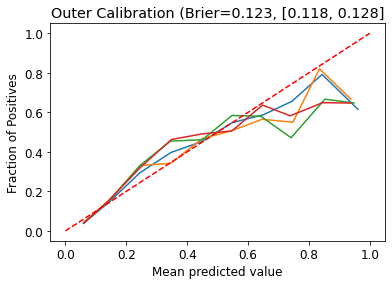

In [31]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()


mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

In [21]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

138
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
AdmitWeight
HistAICD
HistAngina
HistArrythmia
HistCABG
HistHypertension
HistPacemaker
HistPCI
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistPUD
HistLiverTransp
HistAplasticAnemia
HistChemotherapy
HistRadiationTherapy
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistTIA
HistRestrictiveDis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRTA
HistRheumatic
relative_6hr_lead_1hr_obsAcetaminophen
relative_6hr_lead_1hr_obsAdrenergicBronchodilators
relative_6hr_lead_1hr_obsaminoglycosides
relative_6hr_lead_1hr_obsAnticholinergicBronchodilators
relative_6hr_lead_1hr_obsAnticholinergics
relative_6hr_lead_1hr_obsAntidiarrheals
relative_6hr_lead_1hr_obsAntihistamines
relative_6hr_lead_1hr_obsBarbiturates
relative_6hr_lead_1hr_obsBenzodiazepines

In [22]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

63
HistCHF
HistExerciseTol
HistMI
HistPVD
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistHypersplenism
HistHypercoagulableCondition
HistIntracranialMass
HistNeuromuscularDis
HistStrokes
HistAsthma
HistCOPD
HistRespiratoryFail
HistLungTransp
HistSarcoidosis
HistRenalInsuff
HistRenalTransp
relative_6hr_lead_1hr_obsAnticoagulants
relative_6hr_lead_1hr_obsAntiemetics
relative_6hr_lead_1hr_obsBetaBlockers
relative_6hr_lead_1hr_obsCalciumChannelBlockers
relative_6hr_lead_1hr_obsClassVAntiarrhythmics
relative_6hr_lead_1hr_obsDiuretics
relative_6hr_lead_1hr_obsGlucocorticoids
relative_6hr_lead_1hr_obsInsulins
relative_6hr_lead_1hr_obsLaxatives
relative_6hr_lead_1hr_obsMethylxanthines
relative_6hr_lead_1hr_obsNSAIDs
relative_6hr_lead_1hr_obsSodiumChannelBlockers
relative_6hr_lead_1hr_obsSomatostatin
relative_6hr_lead_1hr_obsTricyclicAntidepressants
relative_6hr_lead_1hr_obsVasopressors
last_temp
sofa_cardio
sofa_score
qsofa_sys_bp
sepsis_lactate
suspected_septic_shock
sep

In [23]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [24]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

ipykernel_launcher:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


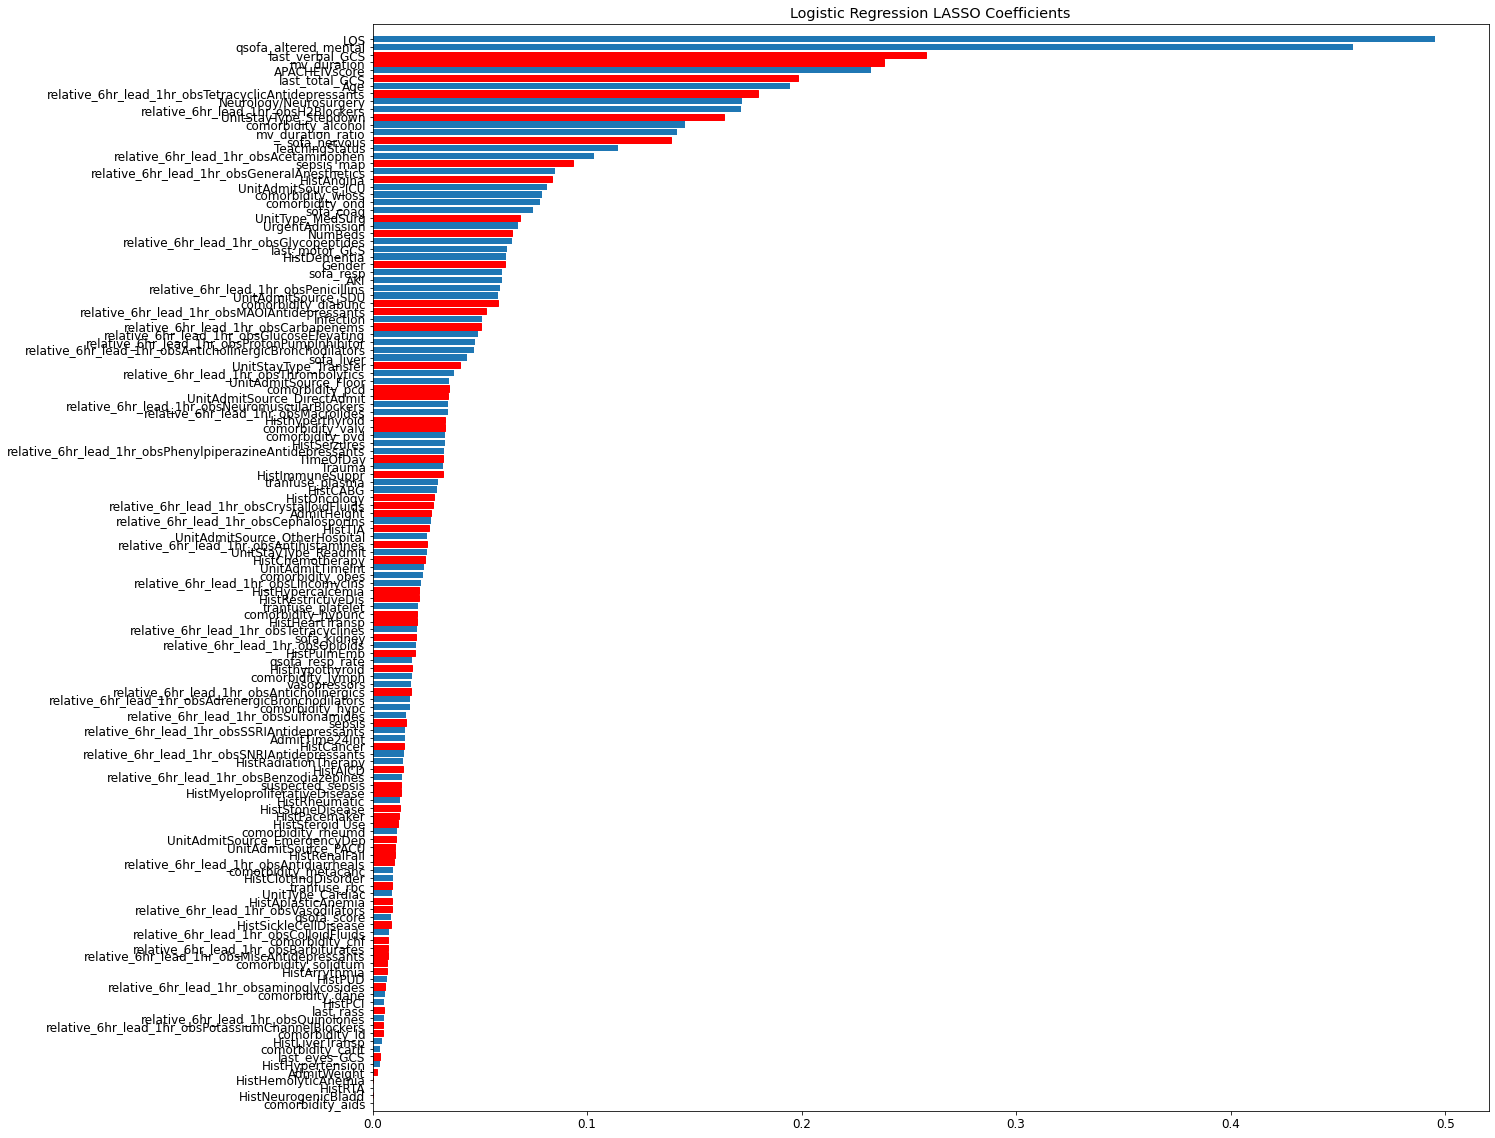

In [17]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

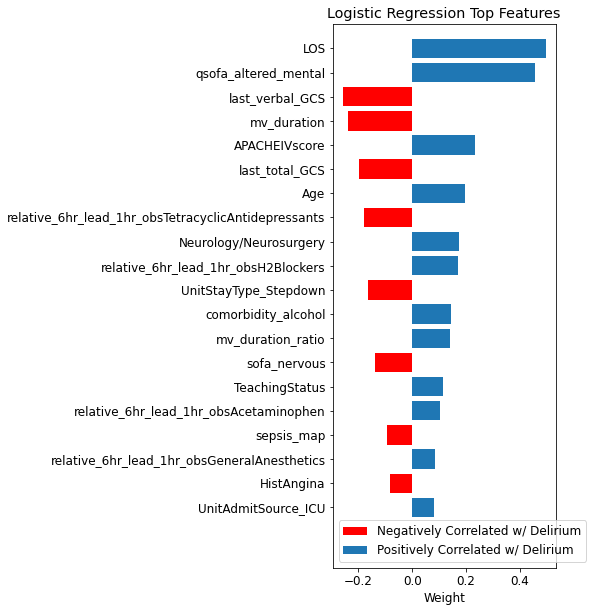

In [18]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

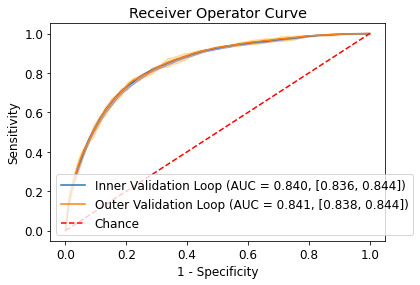

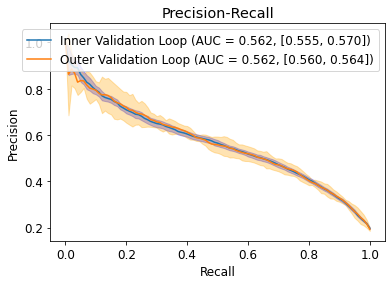

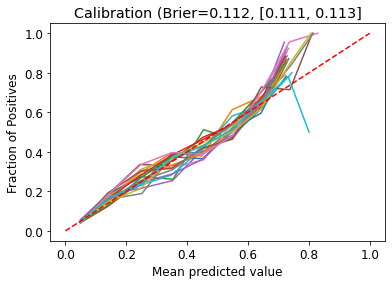

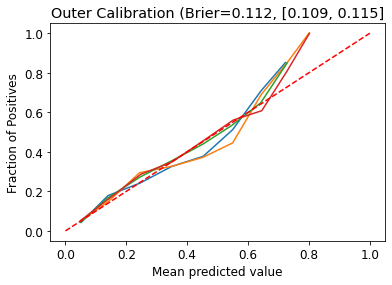

In [3]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_unpruned/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

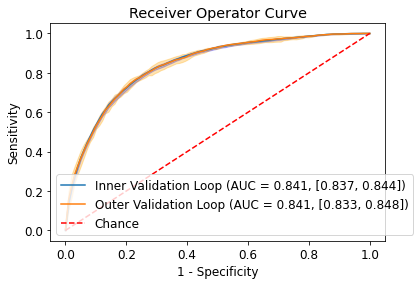

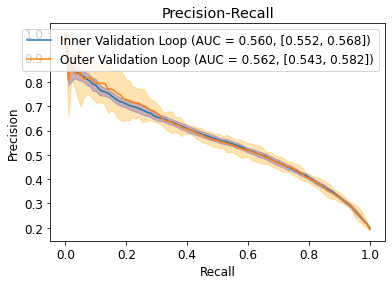

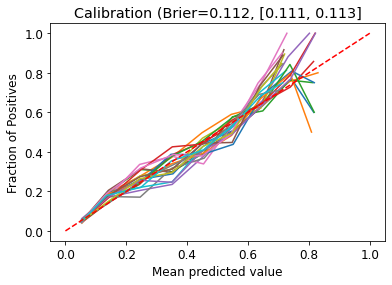

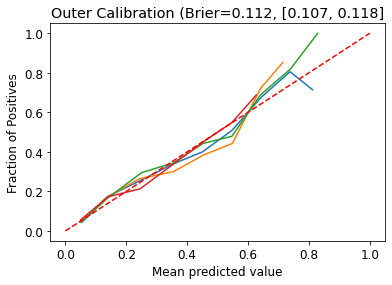

In [3]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [27]:
catboost_result = run_parallel_cross_validation(data, 
												"CatBoostClassifier",
												{"n_estimators": 3000},
												"from catboost import CatBoostClassifier",
												run_once = True,
												bayes=False,
												calibrate=True,
												n_jobs=2,
												run_id=5,
												outer_tuning=True,
												outer_labels=labels)

Inner Validation Complete


In [28]:
import pickle
with open("../pickle/relative_6hr_lead_1hr_obs/mean_unpruned/catboost", "wb") as f:
    pickle.dump(catboost_result, f)

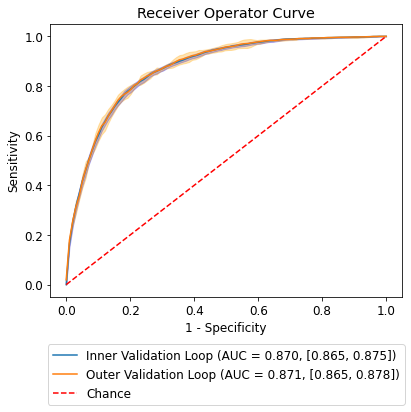

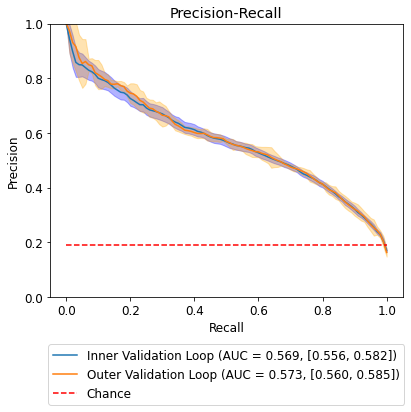

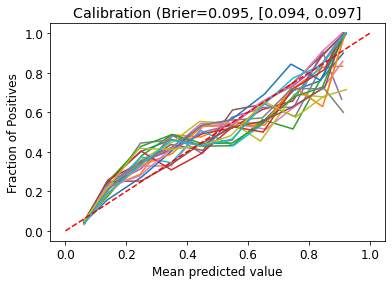

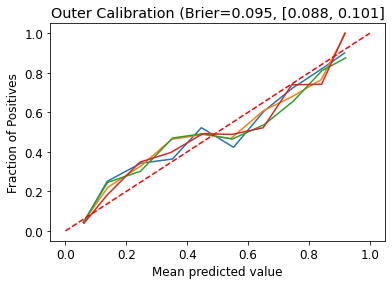

In [32]:
result_dict = catboost_result
name = "relative_6hr_lead_1hr_obs/mean_unpruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure(figsize=(6,6))
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'), loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure(figsize=(6,6))
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision, [0, 1], [pr_baseline, pr_baseline], 'r--')
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.ylim([0,1])
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap),
    'Chance'),
    loc="upper center", bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()


In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")